# Combining all datasets into one single database

### This notebook works with multiple datasets of FI (microthermometry, Raman, and LAICPMS)

The datasets are processed by their respective scripts, and are here combined into one single database containing all the data for each FI

In [1]:
# ---------------- processing FI data from raw data to combined database
        
# --- import modules
import os
import glob

import pandas as pd
import numpy as np # For data manipulation

import matplotlib.pyplot as plt # For plotting
import plotly.express as px #For plotting


# --- set working directory
os.chdir("..") #move wd to one folder up of the script path

root_dir = os.getcwd() #save the current workind directory (one folder up to the script) as root directory

# set specific directories for each analytical dataset
Termo_dir = root_dir + "/Data/2-microthermometry/"
Raman_dir = root_dir + "/Data/3-Raman/"
LA_dir = root_dir + "/Data/4-LAICPMS/"

# Microthermometry data

In [19]:
# --- create dataframe from csv file using pandas import command 

df_thermo = pd.read_csv(Termo_dir + 'Buranga_FI_microthermometry_processed.csv', 
                    encoding = "ANSI", 
                   index_col = 0)

df_thermo = df_thermo.rename(columns={"FI": "analysis"})

df_thermo['field'] = df_thermo['field'].astype(str).replace(('FF'),('ff'),regex=True)
df_thermo['analysis'] = 'fi0' + df_thermo['analysis'].astype(str)

df_thermo

,sample,piece,field,analysis,Host,Length,Width,Phases,VL (%),VV (%),Tm CO2,Te,Tm Hh,Tm H2O,Tm CL,Th CO2,Hmg Mode,salinity(NaCleq wt%),salChen(NaCleq wt%),salBod(NaCleq%)
1,BU18FA22,A,ff1,fi01,quartz,9.1,7.4,L - V,75.0,25.0,-57.453042,-62.880406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BU18FA22,A,ff1,fi02,quartz,9.8,7.8,L - V,72.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BU18FA22,A,ff2,fi01,quartz,24.8,13.3,L - V,73.0,27.0,-61.943362,-72.914963,-25.437852,-18.954633,0.794249,NaN,NaN,14.700080,14.690850,21.652316
4,BU18FA22,A,ff2,fi02,quartz,13.8,8.9,L - V,80.0,20.0,NaN,-24.592817,-24.592817,-16.007713,NaN,NaN,NaN,NaN,NaN,19.452391
5,BU18FA22,A,ff2,fi03,quartz,14.1,10.2,L - V,77.0,23.0,-57.650400,-26.665083,-26.665083,-16.698469,0.373059,NaN,NaN,15.187212,15.188781,19.992090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,BU18FA19(2),A,ff1,fi010,augelite,NaN,NaN,L - V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,BU18FA04,C,ff8,fi01,trolleite,NaN,NaN,L - V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,BU18FA04,C,ff8,fi03,trolleite,NaN,NaN,L - V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,BU18FA04,C,ff8,fi04,trolleite,NaN,NaN,L - V - S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Raman data

In [20]:
# --- create dataframe from csv file using pandas import command 

df_Raman = pd.read_csv(Raman_dir + 'Buranga_FI_Raman_V_composition.csv', 
                    encoding = "ANSI")

df_Raman.drop_duplicates(['sample','piece','field','analysis'], keep='last',inplace=True)

df_Raman['field'] = df_Raman['field'].astype(str).replace(('07','ore1','ore2','trl','Trl','brt','qtz','scz'),
                                                          ('7','ffore1','ffore2','ff','ff','ff','ff','ff'),
                                                          regex=True)

df_Raman = df_Raman.drop(columns=['area_CO2_v1','area_CO2_v2','area_N2','area_CH4', 
                                  'CO2_v1_mol', 'CO2_v2_mol', 'N2_mol', 'CH4_mol', 'laser', 'rest',
       'cross_section_CO2_v1', 'cross_section_CO2_v2', 'cross_section_N2',
       'cross_section_CH4'])

df_Raman

,sample,piece,field,analysis,XCO2(mol%),XN2(mol%),XCH4(mol%)
2,BU18FA02a,A,ff1,fi01,0.963,0.037,0.000
4,BU18FA02a,A,ff1,fi02,0.950,0.050,0.000
6,BU18FA02a,A,ff1,fi03,0.947,0.053,0.000
8,BU18FA02a,A,ff1,fi04,0.948,0.052,0.000
10,BU18FA02a,A,ff1,fi05,0.952,0.048,0.000
...,...,...,...,...,...,...,...
299,BU18FA32,C,ff1,fi06,0.864,0.135,0.001
300,BU18FA32,C,ff1,fi07,0.870,0.122,0.007
301,BU18FA32,C,ff1,fi08,0.885,0.113,0.002
302,BU18FA32,C,ff1,fi09,0.869,0.128,0.003


# LAICPMS data

In [24]:
# --- create dataframe from csv file using pandas import command 

df_LA = pd.read_csv(LA_dir + 'Buranga_FI_LAICPMS_ppm.csv', 
                    encoding = "ANSI")

df_LA = df_LA.drop(columns=['Info'])


df_LA

,sample,piece,field,analysis,Host,Li,B,Na,Mg,Al,...,Li%,K%,Rb%,Cs%,B%,P%,diva,diva%,Alkalis,Alkalis%
0,BU18FA20,B,ff4,fi01,bertossaite,NaN,407.021150,73748.329217,NaN,NaN,...,NaN,2.890657,0.133099,0.095272,0.040702,3.247818,2523.835823,0.252384,104938.611555,10.493861
1,BU18FA20,B,ff4,fi02,bertossaite,6268.782611,409.280683,58457.447454,NaN,NaN,...,0.626878,1.833952,0.110780,0.101552,0.040928,4.066315,193.345928,0.019335,85189.074025,8.518907
2,BU18FA20,B,ff4,fi03,bertossaite,8689.632681,319.732195,48341.835456,35.135155,NaN,...,0.868963,2.538475,0.100304,0.071961,0.031973,2.402430,12297.467809,1.229747,84138.873219,8.413887
3,BU18FA20,J,ff1,fi01,trolleite,372.494329,2452.315596,32403.549770,1280.520729,NaN,...,0.037249,2.739841,0.162818,0.097923,0.245232,1.646108,6400.889639,0.640089,62781.851869,6.278185
4,BU18FA20,J,ff1,fi02,trolleite,150.469589,1331.178712,31016.385052,173.647670,NaN,...,0.015047,3.073082,0.110642,0.046022,0.133118,NaN,375.911116,0.037591,63464.313539,6.346431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,BU18FA04,C,ff8,fi03,trolleite,1402.599873,1400.851275,19672.841121,23.472581,NaN,...,0.140260,4.660214,0.204102,0.030185,0.140085,50.656876,577.125344,0.057713,70020.444397,7.002044
116,BU18FA19,E,ff11b,fi03,quartz,1782.698073,NaN,8081.404714,191.520871,19910.240470,...,0.178270,0.467944,0.028332,0.002445,NaN,1.363627,43203.940174,4.320394,14851.313638,1.485131
117,BU18FA19,E,ff11b,fi04,quartz,NaN,1062.092650,28672.354510,8601.392693,9846.832019,...,NaN,1.990999,0.105757,0.018182,0.106209,NaN,13604.188733,1.360419,49821.734848,4.982173
118,BU18FA04,C,ff8,fi04,trolleite,2377.498607,1092.725065,22106.383624,375.808408,NaN,...,0.237750,3.427477,0.204195,0.036742,0.109273,6.744493,1597.285216,0.159729,61168.018053,6.116802


# Merge all data into single dataframe

In [25]:
df_FI = df_thermo.merge(df_LA, 
                        on=['sample','piece','field','analysis','Host'],
                        how='outer')

df_FI = df_FI.merge(df_Raman,
                    on=['sample','piece','field','analysis'],
                    how='left') 

df_FI

,sample,piece,field,analysis,Host,Length,Width,Phases,VL (%),VV (%),...,Cs%,B%,P%,diva,diva%,Alkalis,Alkalis%,XCO2(mol%),XN2(mol%),XCH4(mol%)
0,BU18FA22,A,ff1,fi01,quartz,9.1,7.4,L - V,75.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959,0.041,0.000
1,BU18FA22,A,ff1,fi02,quartz,9.8,7.8,L - V,72.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.937,0.063,0.000
2,BU18FA22,A,ff2,fi01,quartz,24.8,13.3,L - V,73.0,27.0,...,0.053981,0.193088,NaN,4639.117905,0.463912,56458.554662,5.645855,0.908,0.092,0.000
3,BU18FA22,A,ff2,fi02,quartz,13.8,8.9,L - V,80.0,20.0,...,NaN,NaN,NaN,293.588620,0.029359,27158.119344,2.715812,0.860,0.140,0.000
4,BU18FA22,A,ff2,fi03,quartz,14.1,10.2,L - V,77.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826,0.173,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,BU18FA19(2),A,ff1,fi010,augelite,NaN,NaN,L - V,NaN,NaN,...,0.056746,0.181670,8.762810,NaN,NaN,73632.195509,7.363220,NaN,NaN,NaN
270,BU18FA04,C,ff8,fi01,trolleite,NaN,NaN,L - V,NaN,NaN,...,0.016442,0.061387,NaN,4283.034906,0.428303,70924.559440,7.092456,NaN,NaN,NaN
271,BU18FA04,C,ff8,fi03,trolleite,NaN,NaN,L - V,NaN,NaN,...,0.030185,0.140085,50.656876,577.125344,0.057713,70020.444397,7.002044,NaN,NaN,NaN
272,BU18FA04,C,ff8,fi04,trolleite,NaN,NaN,L - V - S,NaN,NaN,...,0.036742,0.109273,6.744493,1597.285216,0.159729,61168.018053,6.116802,NaN,NaN,NaN


In [26]:
# --- calculate ratios of columns in the dataframe

df_FI["Na/Li"] = df_FI['Na'] / df_FI['Li']
df_FI["Na/K"] = df_FI['Na'] / df_FI['K']

df_FI["K/Cs"] = df_FI['K'] / df_FI['Cs']
df_FI["K/Rb"] = df_FI['K'] / df_FI['Rb']
df_FI["K/Li"] = df_FI['K'] / df_FI['Li']

df_FI["Cs/Li"] = df_FI['Cs'] / df_FI['Li']
df_FI["Rb/Li"] = df_FI['Rb'] / df_FI['Li']

df_FI["Rb/Cs"] = df_FI['Rb'] / df_FI['Cs']

df_FI["Cs/Na"] = (df_FI['Cs'] / df_FI['Na'])
df_FI["Rb/Na"] = (df_FI['Rb'] / df_FI['Na'])

df_FI["Ca/Na"] = df_FI['Ca'] / df_FI['Na']
df_FI["Fe/Na"] = df_FI['Fe'] / df_FI['Na']
df_FI["Ca/Al"] = df_FI['Ca'] / df_FI['Al']
df_FI["Fe/Al"] = df_FI['Fe'] / df_FI['Al']

df_FI["FeMn"] = df_FI['Fe'] + df_FI['Mn']

df_FI["CO2"] = df_FI['XCO2(mol%)']*100
df_FI["N2"] = df_FI['XN2(mol%)']*100
df_FI["CH4"] = df_FI['XCH4(mol%)']*100
df_FI["N2/CO2"] = df_FI['XN2(mol%)']/ df_FI['XCO2(mol%)']


# --- classify dataframe according to host phase

MAG = ((df_FI['Host'] == ('trolleite'))| (df_FI['Host'] == ('wyllieite')))

MH = ((df_FI['Host'] == ('bertossaite')) | (df_FI['Host'] == ('augelite')) | (df_FI['Host'] == ('scorzalite')))

HYD = (df_FI['Host'] == ('brazilianite'))

OUTRO = (df_FI['Host'] == ('quartz'))

df_FI.loc[MAG, 'stage'] = 'mag'
df_FI.loc[MH, 'stage'] = 'mag-hyd'
df_FI.loc[HYD, 'stage'] = 'hyd'
df_FI.loc[OUTRO, 'stage'] = 'qtz'

# --- classify dataframe according to phases present in inclusion

type1 = ((df_FI['Phases'] == ('L - V - S'))| (df_FI['Phases'] == ('S - L - V')))
type2A = ((df_FI['Phases'] == ('L - V')))
type2B = ((df_FI['Phases'] == ('V - L')))
type3 = ((df_FI['Phases'] == ('L - L - V')))

df_FI.loc[type1, 'type'] = 'type1'
df_FI.loc[type2A, 'type'] = 'type2A'
df_FI.loc[type2B, 'type'] = 'type2B'
df_FI.loc[type3, 'type'] = 'type3'

print(df_FI.columns)

df_FI.to_csv(root_dir+'/Data/Buranga_FI_combined_datasets_ppm.csv',index=True)

df_FI

Index(['sample', 'piece', 'field', 'analysis', 'Host', 'Length', 'Width',
       'Phases', 'VL (%)', 'VV (%)', 'Tm CO2', 'Te', 'Tm Hh', 'Tm H2O',
       'Tm CL', 'Th CO2', 'Hmg Mode', 'salinity(NaCleq wt%)',
       'salChen(NaCleq wt%)', 'salBod(NaCleq%)', 'Li', 'B', 'Na', 'Mg', 'Al',
       'Si', 'P', 'K', 'Ti', 'Mn', 'Rb', 'Sr', 'Nb', 'Sn', 'Cs', 'Ba', 'Ta',
       'W', 'Ca', 'Fe', 'NbTa', 'Nb/Ta', 'Li/Na', 'K/Na', 'K/Cs', 'K/Rb',
       'Cs/Na', 'Rb/Na', 'Rb/Cs', 'Ta#', 'Mn#', 'Na%', 'Li%', 'K%', 'Rb%',
       'Cs%', 'B%', 'P%', 'diva', 'diva%', 'Alkalis', 'Alkalis%', 'XCO2(mol%)',
       'XN2(mol%)', 'XCH4(mol%)', 'Na/Li', 'Na/K', 'K/Li', 'Cs/Li', 'Rb/Li',
       'Ca/Na', 'Fe/Na', 'Ca/Al', 'Fe/Al', 'FeMn', 'CO2', 'N2', 'CH4',
       'N2/CO2', 'stage', 'type'],
      dtype='object')


,sample,piece,field,analysis,Host,Length,Width,Phases,VL (%),VV (%),...,Fe/Na,Ca/Al,Fe/Al,FeMn,CO2,N2,CH4,N2/CO2,stage,type
0,BU18FA22,A,ff1,fi01,quartz,9.1,7.4,L - V,75.0,25.0,...,NaN,NaN,NaN,NaN,95.9,4.1,0.0,0.042753,qtz,type2A
1,BU18FA22,A,ff1,fi02,quartz,9.8,7.8,L - V,72.0,28.0,...,NaN,NaN,NaN,NaN,93.7,6.3,0.0,0.067236,qtz,type2A
2,BU18FA22,A,ff2,fi01,quartz,24.8,13.3,L - V,73.0,27.0,...,0.012888,NaN,0.923007,773.851096,90.8,9.2,0.0,0.101322,qtz,type2A
3,BU18FA22,A,ff2,fi02,quartz,13.8,8.9,L - V,80.0,20.0,...,NaN,NaN,NaN,NaN,86.0,14.0,0.0,0.162791,qtz,type2A
4,BU18FA22,A,ff2,fi03,quartz,14.1,10.2,L - V,77.0,23.0,...,NaN,NaN,NaN,NaN,82.6,17.3,0.1,0.209443,qtz,type2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,BU18FA19(2),A,ff1,fi010,augelite,NaN,NaN,L - V,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mag-hyd,type2A
270,BU18FA04,C,ff8,fi01,trolleite,NaN,NaN,L - V,NaN,NaN,...,0.043431,NaN,NaN,1792.479897,NaN,NaN,NaN,NaN,mag,type2A
271,BU18FA04,C,ff8,fi03,trolleite,NaN,NaN,L - V,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mag,type2A
272,BU18FA04,C,ff8,fi04,trolleite,NaN,NaN,L - V - S,NaN,NaN,...,0.043117,NaN,NaN,1221.476808,NaN,NaN,NaN,NaN,mag,type1


In [7]:
# --- create color reference for observed minerals
colors_map = {'augelite' : 'rgb(51,255,51)',
          'bertossaite' : 'rgb(204,121,167)',
          'brazilianite' : 'rgb(250,120,10)',
          'quartz' : 'rgb(240,228,66)',
          'scorzalite' : 'rgb(0,0,255)',
          'trolleite' : 'rgb(0,158,115)',
          'wyllieite' : 'rgb(0,170,250)',
             'rosemaryite' : 'rgb(250,10,10)',
             'montebrasite' : 'rgb(255,150,150)'}

Host_list = ["wyllieite", "trolleite", "bertossaite",'scorzalite',
             'augelite','brazilianite', 'quartz']

# --- break the dataset in to subsets according to host mineral
df_wyl = df_FI.query('Host == "wyllieite"')
df_trl = df_FI.query('Host == "trolleite"')
df_bts = df_FI.query('Host == "bertossaite"')
df_aug = df_FI.query('Host == "augelite"')
df_brz = df_FI.query('Host == "brazilianite"')
df_scz = df_FI.query('Host == "scorzalite"')
df_qtz = df_FI.query('Host == "quartz"')

df_mag = pd.concat([df_wyl, df_trl])

df_MH = pd.concat([df_bts, df_aug,df_scz])

In [9]:
# --- statistical description of selected dataframes
to_stat = df_qtz.query('type == "type2A"') #select the desired dataframe

    # -- select the relevant columns to analyze - only numeric values
to_stat = to_stat[['Length', 'Width','VL (%)', 'VV (%)', 
                   'Tm CO2', 'Te', 'Tm Hh', 'Tm H2O','Tm CL', 'Th CO2', 
                   'salinity(NaCleq wt%)','salChen(NaCleq wt%)', 'salBod(NaCleq%)', 
                   'CO2','N2', 'CH4', 'N2/CO2', 
                   'Li', 'B', 'Na', 'Mg', 'K', 'Ca','Ti', 'Mn', 'Fe', 'Rb', 'Sr', 'Nb', 'Sn', 'Cs', 'Ba', 'Ta','W',   
                   'Nb/Ta', 'Li/Na', 'K/Na', 'K/Cs', 'K/Rb','Cs/Na', 'Rb/Na', 'Rb/Cs', 'Alkalis%',
                   'Na/Li', 'Na/K', 'Ca/Na', 'Fe/Na', 'Ca/Al','Fe/Al']]

    # --- get statistical values from the dataframe
stat_count = to_stat.count()
stat_med = to_stat.median()
stat_std = to_stat.std()
stat_max = to_stat.max()
stat_min = to_stat.min()


stat_FI = pd.DataFrame() # create an empty dataframe to populate later

lst = [to_stat.iloc[0]['Host'],to_stat.iloc[0]['Phases'],to_stat.iloc[0]['type']] #list with relevant data info 

    # --- populate an empty dataframe with the statistical calculations
stat_FI['Count'] = stat_count
stat_FI['Min'] = stat_min
stat_FI['Max'] = stat_max
stat_FI['Median'] = stat_med 
stat_FI['STD'] = stat_std
stat_FI['Host'] = lst[0]
stat_FI['Phases'] = lst[1]

stat_FI = stat_FI.T

# stat_FI.to_csv(data_dir+'Buranga_FI_stat_mol.csv',index=True)

stat_FI[['CO2','N2','CH4','N2/CO2']]

KeyError: 'Host'

# Binary plots

In [56]:
        # --- plot figures - binary diagrams

to_plot = df_FI

# to_plot = df_trl

# to_plot = df_trl.query('(type == "type1")')# & (field == "ff7b")')


x = 'Cs/Li'
y = 'K/Li'


fig = px.scatter(to_plot, x=x, y=y,
                 symbol = "sample", 
                 color = "Host", 
                 hover_data=["sample",'piece','field',"analysis","Phases","Host"],
                 width=650, height=500,
                 category_orders={"Host": ["wyllieite", 'montebrasite',
                                           "rosemaryite", "trolleite", 
                                           "bertossaite",'scorzalite',
                                          'augelite','brazilianite', 'quartz']},
                 color_discrete_map=colors_map, # replaces default color mapping by value
                log_x=True, log_y=True,
                labels={x: x,# + " [mol/kg]",
                        y: y}# + " [mol/kg]"}
                )

fig.update_layout(template="simple_white")

fig.update_traces(marker=dict(size=10, 
                              line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'),
                  opacity=0.85)



fig.update_xaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")
fig.update_yaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")


        # Add extra traces and annotations to the graph, e.g. legend for ratio lines

# fig.add_traces(list(px.line(x=[0, 0.1], y=[0, 0.15]).select_traces())) #1:1.5 ratio
# fig.add_traces(list(px.line(x=[0, 0.1], y=[0, 1.5]).select_traces())) #1:15 ratio

# fig.add_traces(list(px.line(x=[0, 100], y=[0, 0.1]).select_traces())) #1:1000 ratio 
# fig.add_traces(list(px.line(x=[0, 100], y=[0, 2]).select_traces())) #1:50 ratio

# fig.add_traces(list(px.line(x=[0, 10], y=[0, 10]).select_traces())) #1:1 ratio

# annotations = [
#     dict(xref='paper', yref='paper', x=0.7, y=0.99,
#                               text='1:50<br>ratio',
#                               font=dict(family='Arial',
#                                         size=14,
#                                         color='rgb(100,100,100)'),
#                               showarrow=False),
               
#               dict(xref='paper', yref='paper', x=0.99, y=0.65,
#                               text='1:1000<br>ratio',
#                               font=dict(family='Arial',
#                                         size=14,
#                                         color='rgb(100,100,100)'),
#                               showarrow=False)
               
#                dict(xref='paper', yref='paper', x=0.55, y=0.98,
#                               text='1:10<br>ratio',
#                               font=dict(family='Arial',
#                                         size=14,
#                                         color='rgba(0,0,255,0.5)'),
#                               showarrow=False),
               
#                dict(xref='paper', yref='paper', x=0.99, y=0.76,
#                               text='1:2<br>ratio',
#                               font=dict(family='Arial',
#                                         size=14,
#                                         color='rgba(100,100,100,1)'),
#                               showarrow=False)
#               ]

# fig.update_layout(annotations=annotations)

# fig.data[-1].line.color = 'rgba(0,0,0,0.3)'
# fig.data[-2].line.color = 'rgba(0,0,0,0.3)'

# fig.data[-3].line.color = 'rgba(0,0,255,0.3)'
# fig.data[-4].line.color = 'rgba(0,0,255,0.3)'

fig.data = fig.data[::-1] #reverse order of plotting


# fig.update_xaxes(tickvals=[0,0.25,0.5,0.75,1,1.25,1.5])
# fig.update_yaxes(tickvals=[0,0.25,0.5,0.75,1,1.25,1.5])

# fig.update_xaxes(range=(0,3))
# fig.update_yaxes(range=(0,1.5))

# fig.write_image(data_dir+"figures/plot_binary-mRb_mCs_log.pdf");
fig.show()

# Ternary plot

In [20]:
A = 'Na'
B = 'K'
C = 'Li'

#define subset within dataset
df_subset = df_FI.loc[:, [A, B, C]]

#combine calculated data with metadata
df_subset[['sample', 'piece', 'field', 'analysis', 'Host', 'Phases','type']] = df_FI[['sample', 'piece', 'field', 'analysis', 'Host', 'Phases','type']]


#ternary plot of normalized subset
fig2 = px.scatter_ternary(df_subset, a=A, b=B, c=C,
                          hover_data=['sample',"piece",'field','analysis',df_subset.index],
                          symbol = "type", color="Host",
                          template='plotly_white',
                          color_discrete_map=colors_map,
#                           labels={A: 'CO<sub>2</sub>',
#                                   B: 'N<sub>2</sub>', 
#                                   C: 'CH<sub>4</sub>'}
                         )

fig2.update_traces(marker=dict(size=10, 
                              line=dict(width=0.7,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'),
                  opacity=0.85)

fig2.update_ternaries(aaxis_min=0.2)

# fig2.update_layout(title_x=0.2, 
#                   title_text="Vapor composition FI - " #+ df_subset.iloc[0][7], 
#                  )

# fig2.write_image(data_dir+"figures/plot_ternary_NaKLi_mol.pdf")# + df_subset.iloc[0][7] + ".pdf")

# print(df_subset.loc[79])

fig2.show()

# Histogram

In [22]:
to_plot = df_FI

x = 'XCO2(mol%)'

fig = px.histogram(to_plot, x=x, 
                       color="Host",
                       pattern_shape="type",
                       labels={x: x+" (<sup>o</sup>C)"},
                       color_discrete_map=colors_map,
                       hover_data=["sample",'piece','field',"analysis","Phases","Host"])



# -------------------------------------------------------------------------------------------------

fig.update_xaxes(range=[to_plot[x].min()-1, to_plot[x].max()+1])

fig.update_layout(template="simple_white", 
                  barmode='stack',
                 height=600, width=600)

fig.update_xaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")
fig.update_yaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")

# x_tick = np.arange(to_plot[x].min()-1,to_plot[x].max()+1,1, dtype=int)
# fig.update_xaxes(tickvals=np.arange(-30,35,1))

fig.update_traces(marker=dict(line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                 xbins=dict(size=0.01)
                 )


fig.update_xaxes(range=(0.7,1.01))

# fig.write_image(data_dir+"figures/plot_hists_TmCL.pdf")

fig.show()

In [21]:
# ---------- Create subplots using plotly.express histogram

from plotly.subplots import make_subplots
import plotly.graph_objects as go

to_plot = df_FI

#Create a 2x2 subplot
fig = make_subplots(rows=2, cols=2)

x_list = ('Tm Hh','Tm H2O','Tm CL','Th CO2')

       
        # Create figures in Express
figure1 = px.histogram(to_plot, x=x_list[0], 
                       color="Host",
                       pattern_shape="type",
#                        labels={x: x+" (<sup>o</sup>C)"},
                       color_discrete_map=colors_map,
                       hover_data=["sample",'piece','field',"analysis","Phases","Host"])

figure2 = px.histogram(to_plot, x=x_list[1], 
                       color="Host",
                       pattern_shape="type",
#                        labels={x: x+" (<sup>o</sup>C)"},
                       color_discrete_map=colors_map,
                       hover_data=["sample",'piece','field',"analysis","Phases","Host"])

figure3 = px.histogram(to_plot, x=x_list[2], 
                       color="Host",
                       pattern_shape="type",
#                        labels={x: x+" (<sup>o</sup>C)"},
                       color_discrete_map=colors_map,
                       hover_data=["sample",'piece','field',"analysis","Phases","Host"])

figure4 = px.histogram(to_plot, x=x_list[3], 
                       color="Host",
                       pattern_shape="type",
                       color_discrete_map=colors_map,
#                        labels={x: x+" (<sup>o</sup>C)"},
                       hover_data=["sample",'piece','field',"analysis","Phases","Host"])


# For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
# This is essentially breaking down the Express fig into it's traces
figure1_traces = []
figure2_traces = []
figure3_traces = []
figure4_traces = []

for trace in range(len(figure1["data"])):
    figure1_traces.append(figure1["data"][trace])
for trace in range(len(figure2["data"])):
    figure2_traces.append(figure2["data"][trace])
for trace in range(len(figure3["data"])):
    figure3_traces.append(figure3["data"][trace])
for trace in range(len(figure4["data"])):
    figure4_traces.append(figure4["data"][trace])


# Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot
for traces in figure1_traces:
    fig.append_trace(traces, row=1, col=1)
for traces in figure2_traces:
    fig.append_trace(traces, row=1, col=2)
for traces in figure3_traces:
    fig.append_trace(traces, row=2, col=1)
for traces in figure4_traces:
    fig.append_trace(traces, row=2, col=2)


# -------------------------------------------------------------------------------------------------

fig.update_xaxes(title_text=x_list[0] + " (<sup>o</sup>C)", range=[to_plot[x_list[0]].min()-1, to_plot[x_list[0]].max()+1], row=1, col=1)
fig.update_xaxes(title_text=x_list[1] + " (<sup>o</sup>C)", range=[to_plot[x_list[1]].min()-1, to_plot[x_list[1]].max()+1], row=1, col=2)
fig.update_xaxes(title_text=x_list[2] + " (<sup>o</sup>C)", range=[to_plot[x_list[2]].min()-1, to_plot[x_list[2]].max()+1], row=2, col=1)
fig.update_xaxes(title_text=x_list[3] + " (<sup>o</sup>C)", range=[to_plot[x_list[3]].min()-1, to_plot[x_list[3]].max()+1], row=2, col=2)


fig.update_layout(template="simple_white", 
                  barmode='stack',
                  showlegend=False,
                 height=900, width=1000)

fig.update_xaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")
fig.update_yaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")

# x_tick = np.arange(to_plot[x].min()-1,to_plot[x].max()+1,1, dtype=int)
fig.update_xaxes(tickvals=np.arange(-30,35,1))

fig.update_traces(marker=dict(line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                 xbins=dict(size=1)
                 )

# fig.write_image(data_dir+"figures/plot_hists.pdf")

fig.show()

# Boxplots

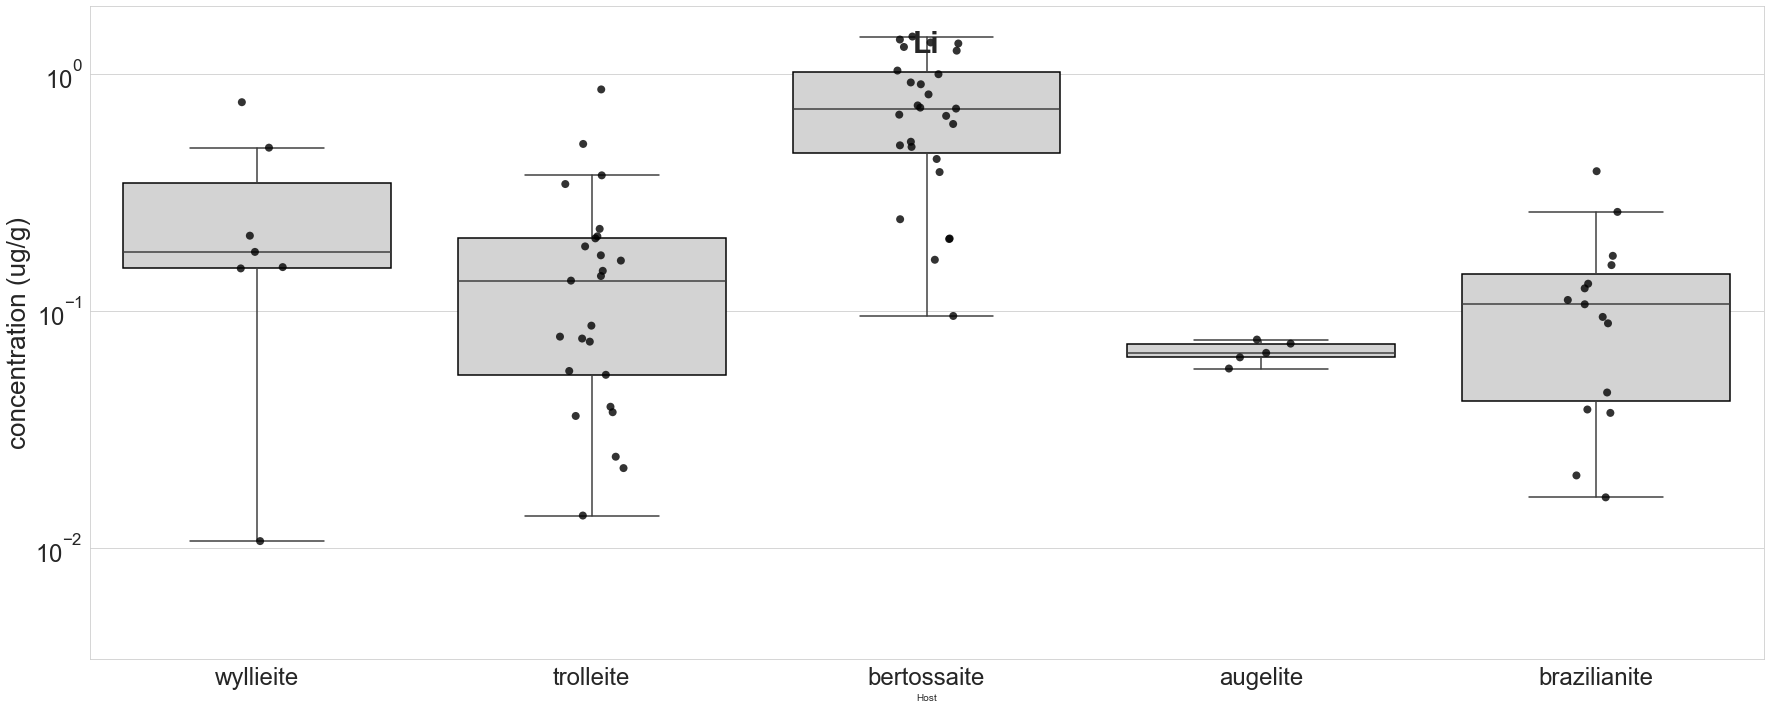

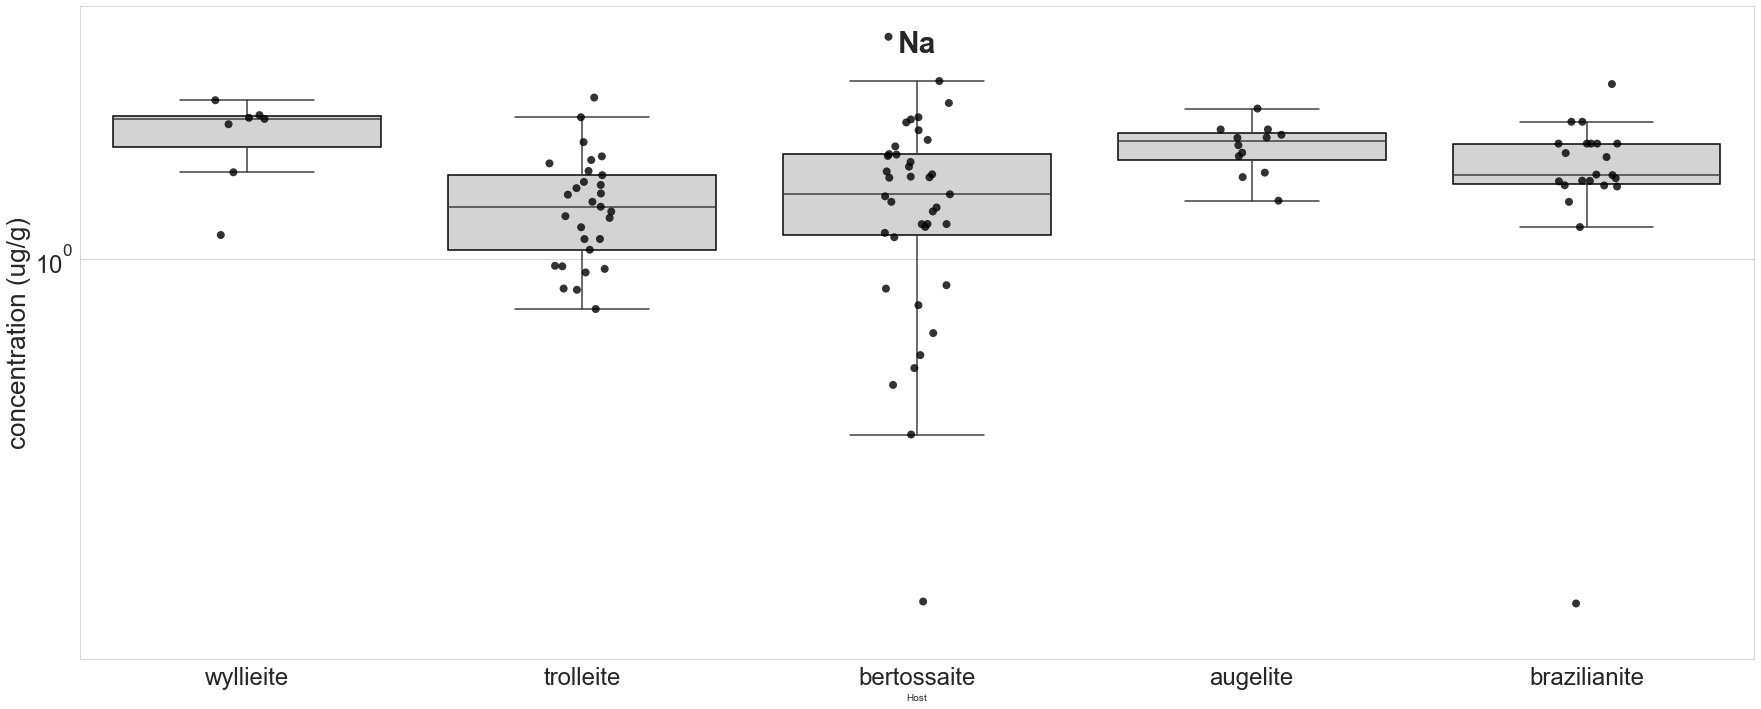

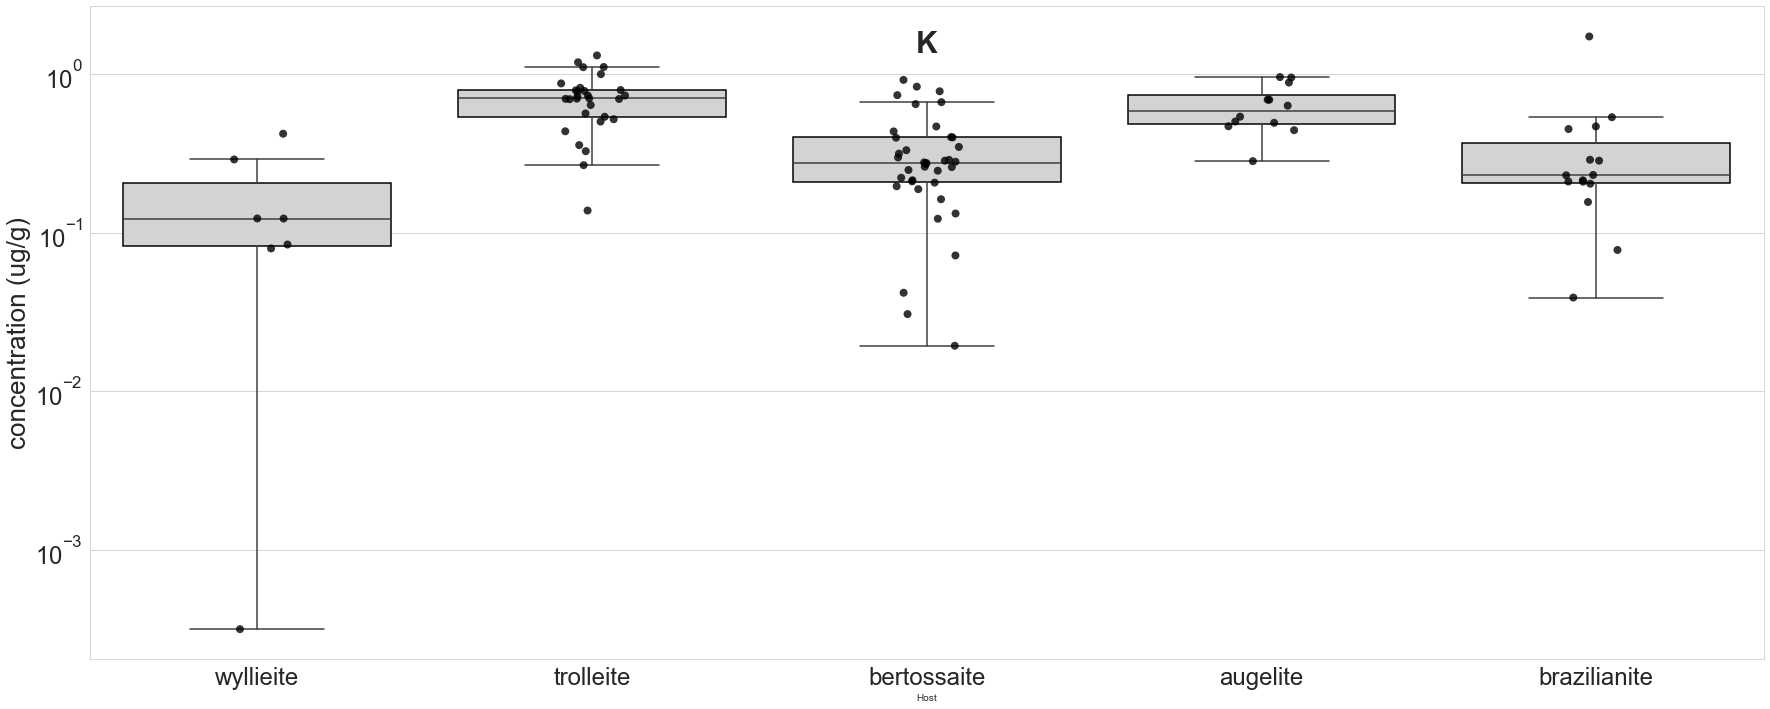

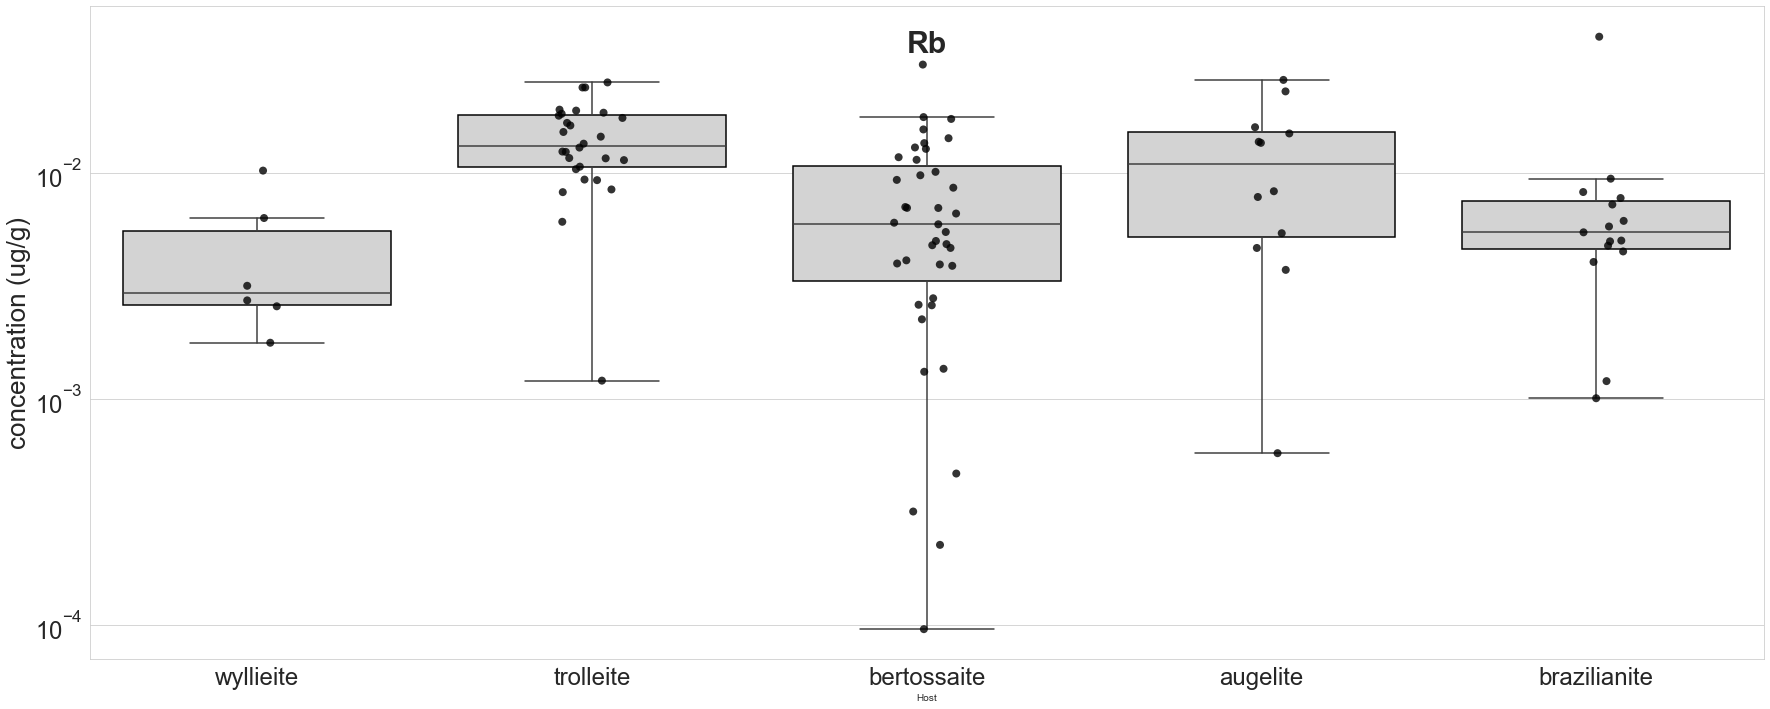

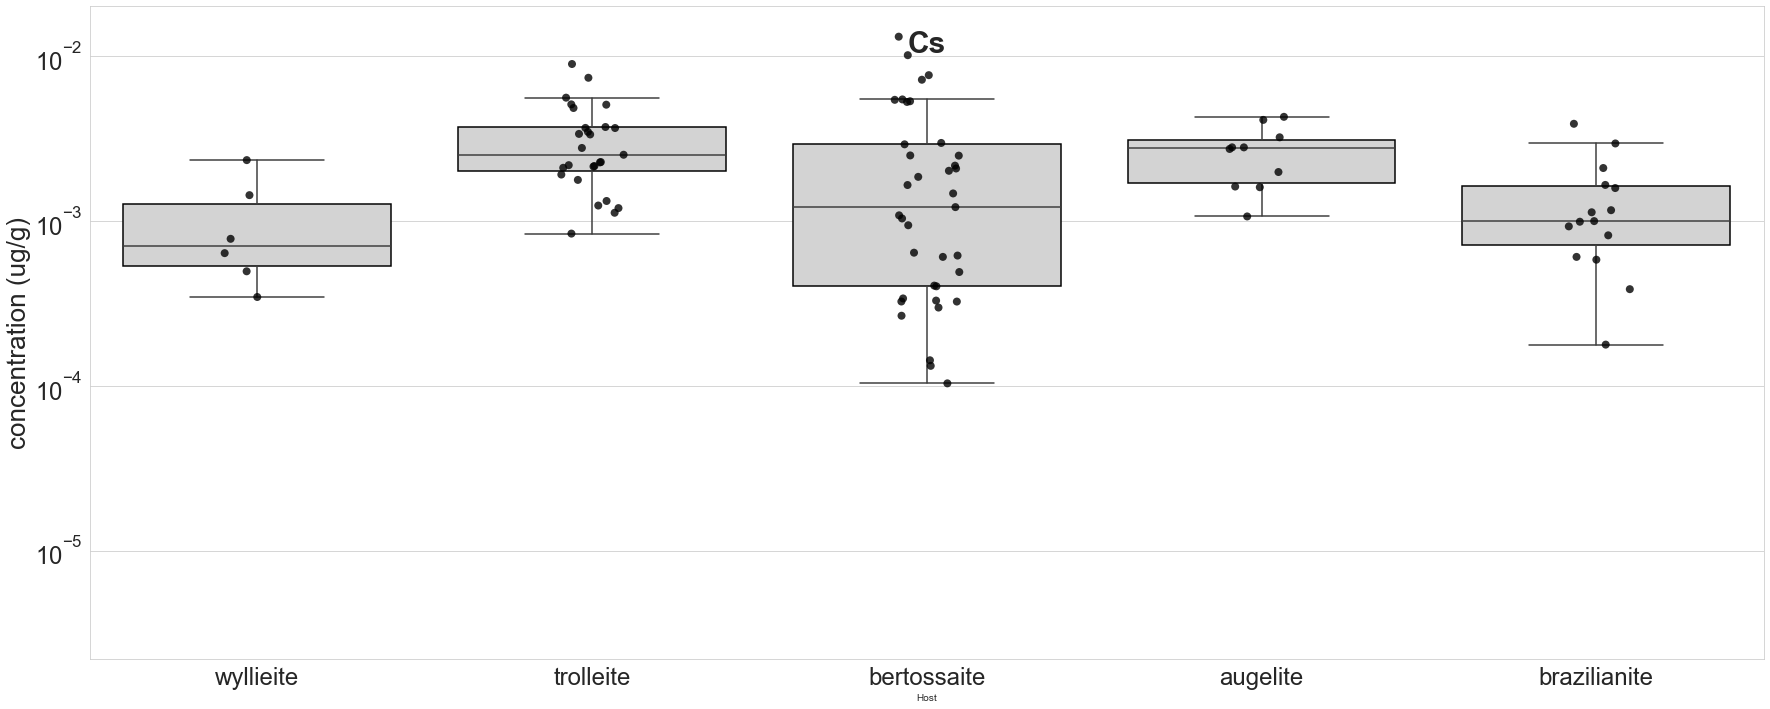

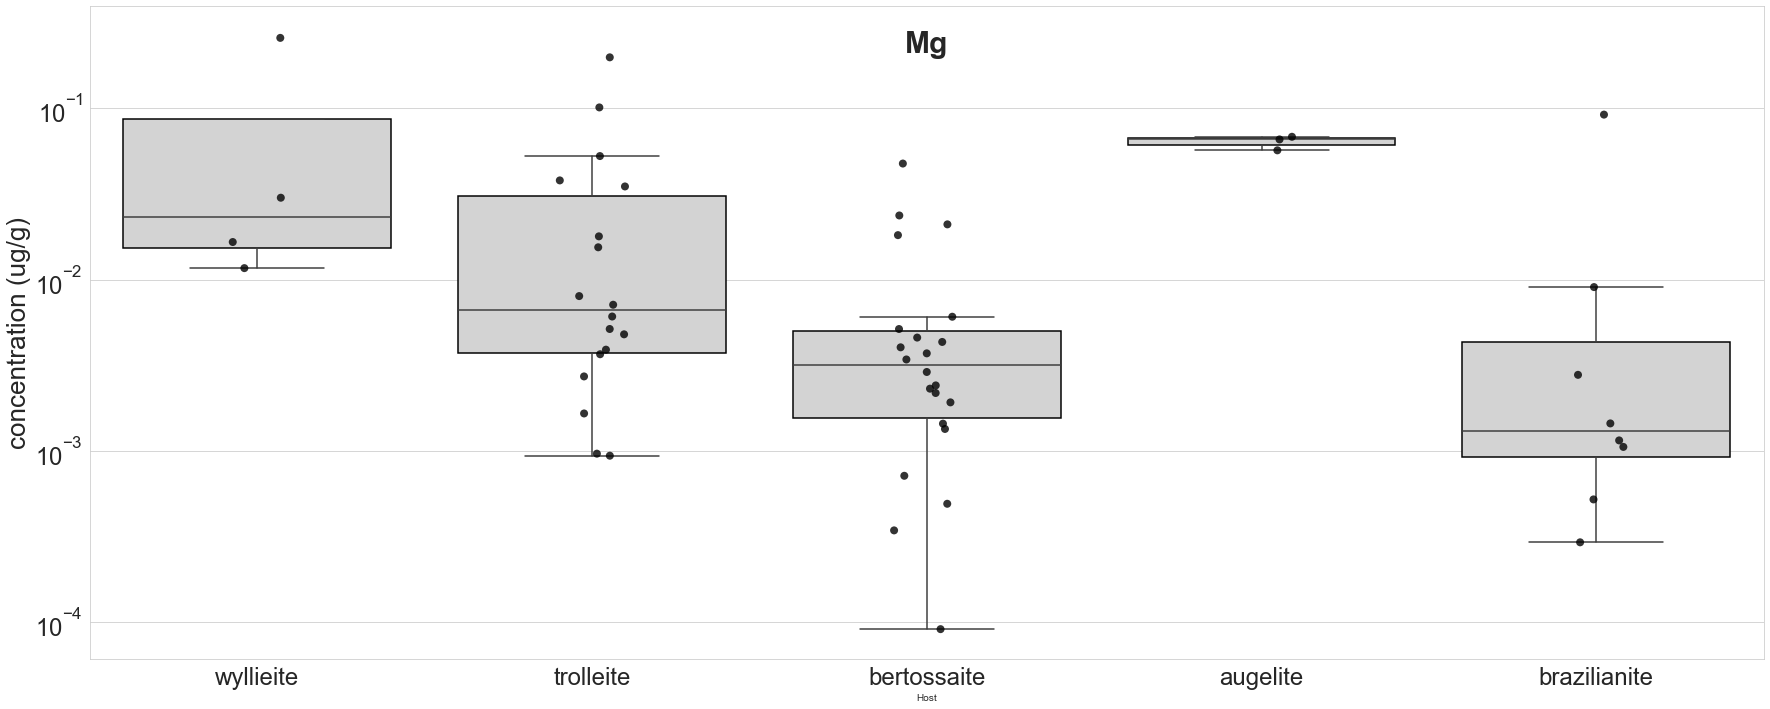

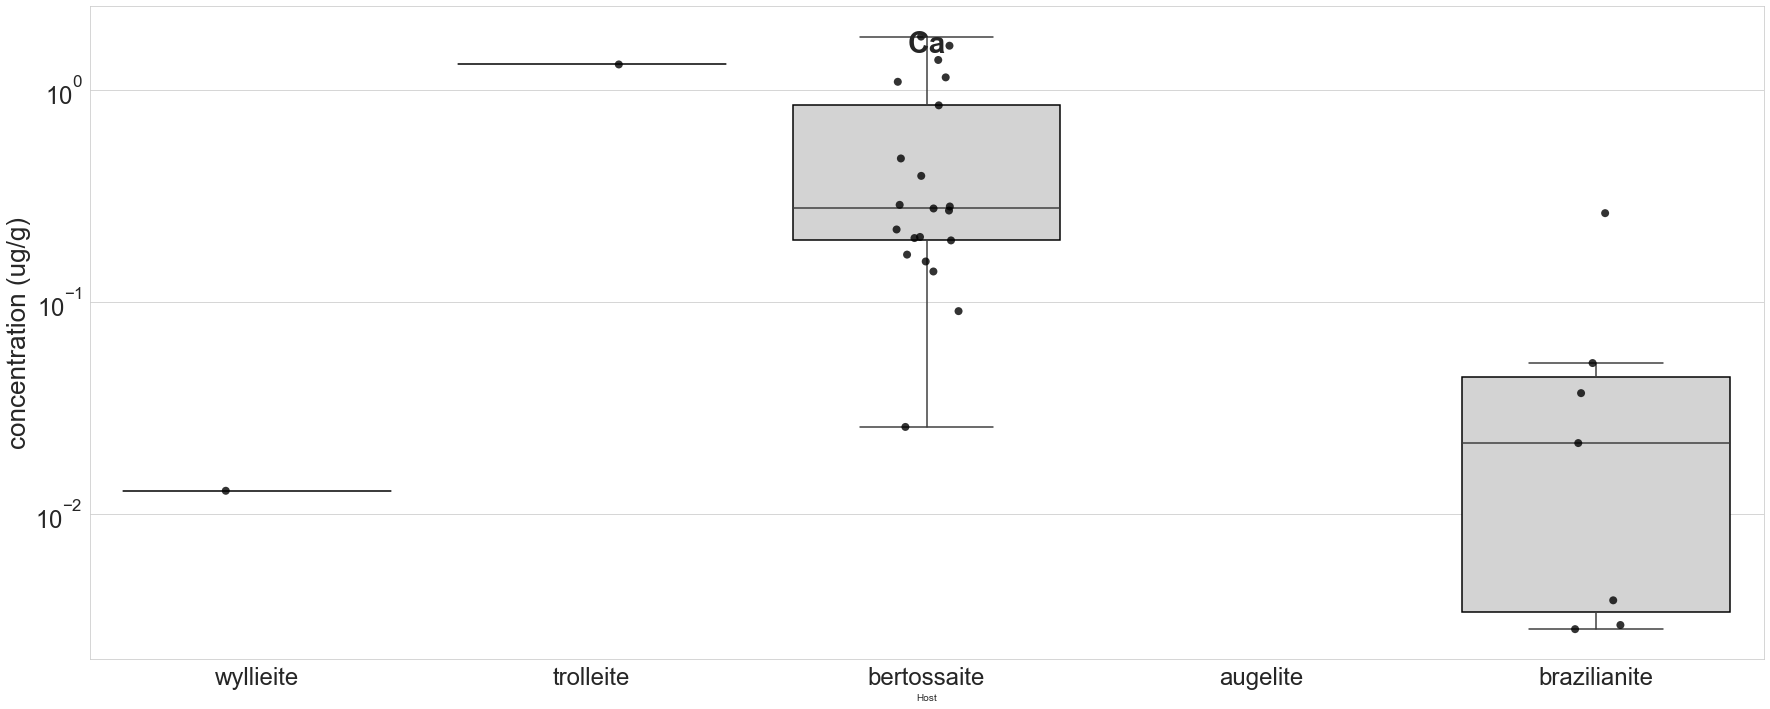

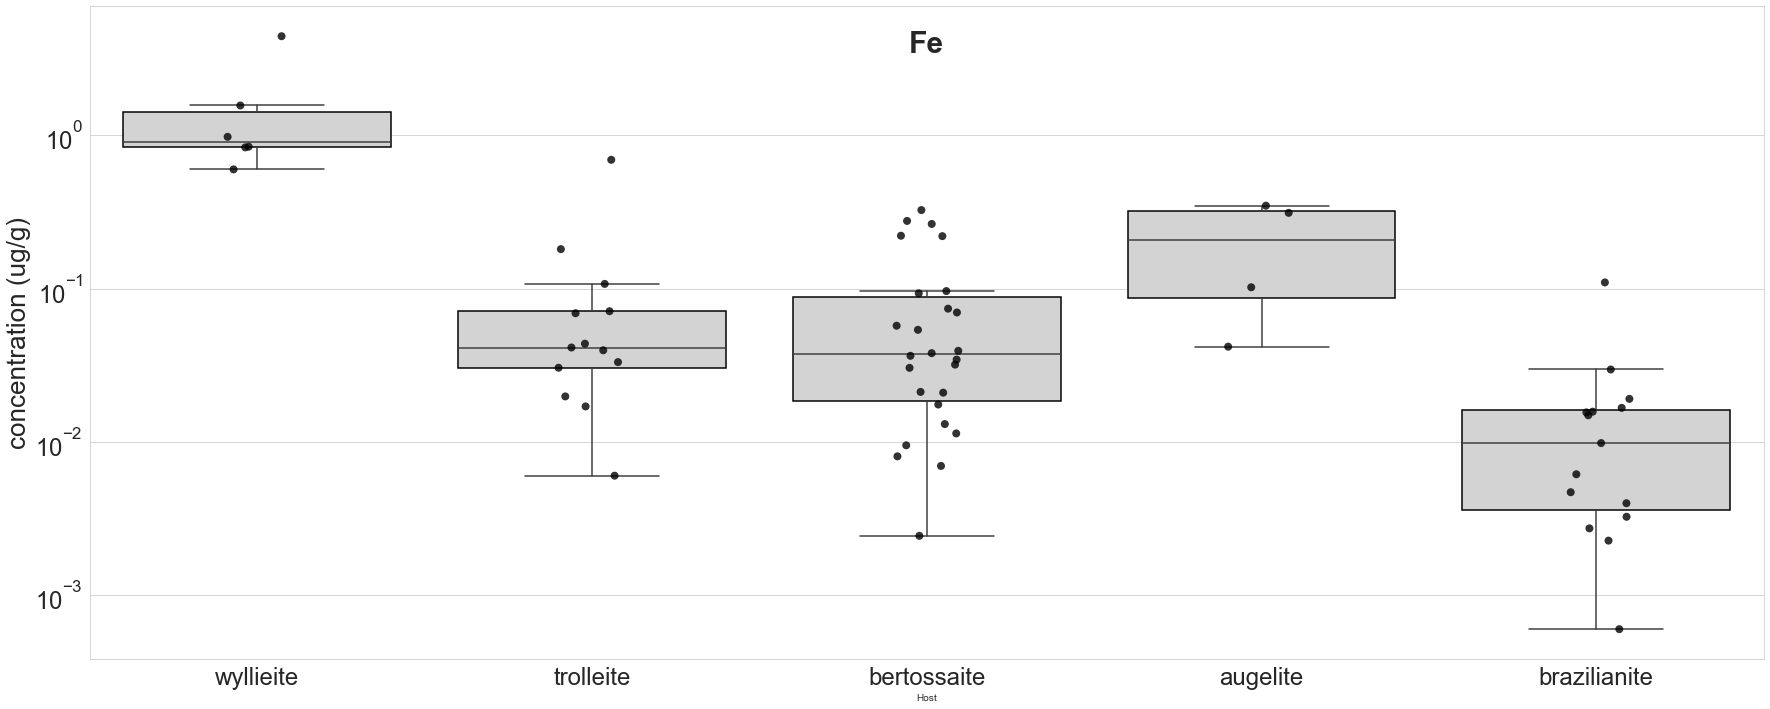

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_plot = df_FI.copy()

# df_plot = df_trl.query('sample == "BU18FA20"')


host_list = ['wyllieite', 'trolleite', 'bertossaite', 'augelite',
#              'montebrasite','rosemaryite','scorzalite', 
             'brazilianite']

elem_list = ['Li', 'Na', 'K','Rb', 'Cs','Mg', 'Ca', 'Fe']

# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,5))

# Histogram + kernel density function curve

# ax = sns.displot(df_plot, x="K%", hue="Host", multiple='stack', kde=True)#col="Host"
# sns.kdeplot(data=df_plot, x="K", hue="Host")





# Boxplot + data on top

x = 'Host'



# ax = sns.violinplot(x=x, y=y, data=df_plot, showfliers = False, hue="sample")
for elem in elem_list:
    fig = plt.figure(figsize =(30, 12))

    sns.set_style("whitegrid")

    y = elem
    ax = sns.stripplot(data=df_plot, 
                       x=x, y=y,
                       color='k', order = host_list, size=8, jitter=True, alpha=0.8)
    ax = sns.boxplot(data=df_plot, 
                     x=x, y=y,
                     showfliers = False, order = host_list)
    ax.set(yscale="log")


    for i,box in enumerate(ax.artists):
        box.set_edgecolor('black')
        box.set_facecolor('lightgrey')



# # Binary distribution map

# sns.displot(df_plot, x="K%", y="Na%", hue="Host", kind="kde")




# # Binary scatter plot 

# sns.scatterplot(data=df_plot, x="K%", y="Na%", hue="Host")
# ax.set_xlim([0, 12.5])




# Mixed plots

# plot = sns.jointplot(data=df_plot, x="K%", y="B%", hue="Host")

# plot.ax_marg_x.set_xlim(-2.5, 7.5)
# ax.set_ylim(0.001, 30000)



    # Add artistic features to graph
    plt.title(y, fontsize=30, fontname="Arial",fontweight="bold",y=0.92)
    # plt.xlabel('Host', fontsize=26)
    plt.ylabel('concentration (ug/g)', fontsize=26)


    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    # ax.set_yticks([1e-2, 1e-1, 1e0,10,100,1000,1e4,1e5,1e6,1e7])

    # ax.set_ylim(1e-1, 1e5)

    # plt.savefig(base_dir+'graphs/plot_boxp_'+y+'.pdf')
    plt.show()

# Raman spectra plots

In [26]:
# --- look into working directory and create a list with selected files - .txt
os.chdir(Raman_dir+'maps/')


Raman_files = glob.glob('*.txt')

V_files = glob.glob('*-v*.txt')

S_files = glob.glob('*-s*.txt')

L_files = glob.glob('*-l*.txt')

print(Raman_files)
len(Raman_files)

['bu20-g-ff1-fi01_cls_burangaite.txt', 'bu20-G-ff1-FI01_CLS_burangaite_raw.txt', 'bu20-g-ff1-fi01_cls_carbonic phase.txt', 'bu20-G-ff1-FI01_CLS_Carbonic phase_raw.txt', 'bu20-g-ff1-fi01_cls_montebrasite.txt', 'bu20-G-ff1-FI01_CLS_Montebrasite_raw.txt', 'bu20-G-ff1-FI01_CLS_Trolleite (host)_raw.txt', 'bu20-g-ff1-fi01_cls_wardite.txt', 'bu20-G-ff1-FI01_CLS_wardite_raw.txt', 'BU20b-area2-blue_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_15sX2.txt', 'burangaite-Ph1_BU22C_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_20sX2.txt', 'burangaite2-Ph1_BU22C_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_20sX2.txt', 'burangaite_0.txt', 'burangaite_BU20C_150 (500nm)_633nm_Edge_100%_x100_VIS_H100um_20sX2.txt', 'burangaite_buranga_r070408__raman__532__0__unoriented__raman_data_processed__21357.txt', 'burangaite_edit.txt', 'burangaite__r070408__broad_scan__532__0__unoriented__raman_data_raw__15025.txt', 'liquid_0.txt', 'liquid_edit.txt', 'montebrasite_0.txt', 'montebrasite_edit.txt', 'rutile_0.txt'

26

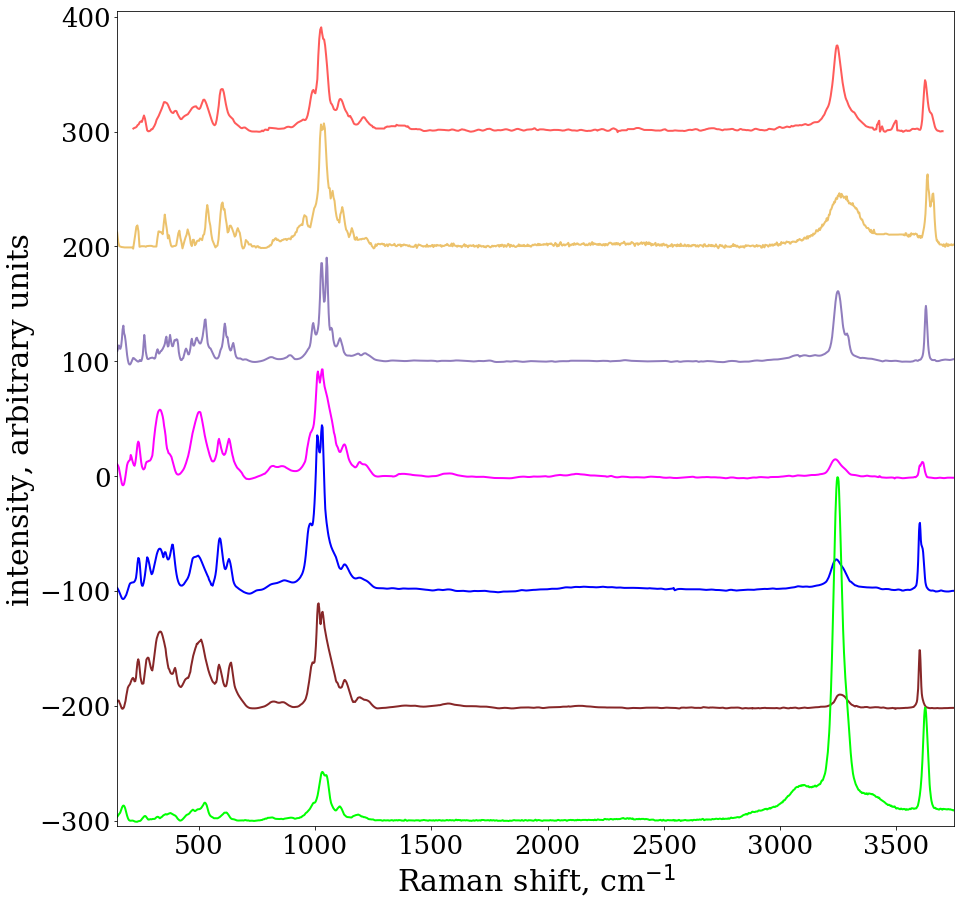

In [27]:
# get the index of spectrum to plot

list_to_use = Raman_files


file1 = 'bu20-g-ff1-fi01_cls_burangaite.txt'

file2 = 'burangaite_edit.txt'

file3 = 'BU20b-area2-blue_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_15sX2.txt'

file4 = 'burangaite-Ph1_BU22C_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_20sX2.txt'

file5 = 'burangaite2-Ph1_BU22C_150 (500nm)_633nm_Edge_100%_x50_VIS_LWD_H100um_20sX2.txt'

file6 = 'burangaite_BU20C_150 (500nm)_633nm_Edge_100%_x100_VIS_H100um_20sX2.txt'

file7 = 'burangaite__r070408__broad_scan__532__0__unoriented__raman_data_raw__15025.txt'


spectrum1 = np.genfromtxt(list_to_use[list_to_use.index(file1)],comments='#', delimiter='\t')
spectrum2 = np.genfromtxt(list_to_use[list_to_use.index(file2)],comments='#', delimiter='\t')
spectrum3 = np.genfromtxt(list_to_use[list_to_use.index(file3)],comments='#', delimiter='\t')
spectrum4 = np.genfromtxt(list_to_use[list_to_use.index(file4)],comments='#', delimiter='\t')
spectrum5 = np.genfromtxt(list_to_use[list_to_use.index(file5)],comments='#', delimiter='\t')
spectrum6 = np.genfromtxt(list_to_use[list_to_use.index(file6)],comments='#', delimiter='\t')
spectrum7 = np.genfromtxt(list_to_use[list_to_use.index(file7)],comments='#', delimiter='\t')

# create a new plot for showing the spectrum
plt.figure(figsize=(15,15)) #code for creating figure

plt.plot(spectrum1[:,0],(spectrum1[:,1]/1.5)+300,color=("#ff5b5aff"), linewidth=2,label='Montebrasite')
plt.plot(spectrum2[:,0],(spectrum2[:,1]*3)+200,color=("#ecc26cff"), linewidth=2,label='Burangaite')
plt.plot(spectrum3[:,0],(spectrum3[:,1]/28)+100,color=("#907dbdff"), linewidth=2,label='Wardite')
plt.plot(spectrum4[:,0],(spectrum4[:,1]/25),color=("#ff00feff"), linewidth=2,label='Rutile')
plt.plot(spectrum5[:,0],(spectrum5[:,1]/20)-100,color=("#0000feff"), linewidth=2,label='Liquid')
plt.plot(spectrum6[:,0],(spectrum6[:,1]/28)-200,color=("#872728ff"), linewidth=2,label='Vapor')
plt.plot(spectrum7[:,0],(spectrum7[:,1]/100)-300,color=("#00ff01ff"), linewidth=2,label='Trolleite(Host)')


plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 30, fontfamily = 'serif')
plt.ylabel("intensity, arbitrary units", fontsize = 30, fontfamily = 'serif')
# plt.title("Fig. 1: the raw data",fontsize = 12,fontweight="bold")

plt.yticks(fontsize=26, fontfamily = 'serif')
plt.xticks(fontsize=26, fontfamily = 'serif')

# plt.legend(loc='upper center')

plt.xlim(150,3750)
plt.ylim(-305,405)

# plt.savefig("map_spectra_raw.svg")

plt.show()